In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_regression, f_regression

# Data Exploration

In [33]:
# Load Data
online_shopping = pd.read_csv("Online_Shopping.csv", delimiter=';')
online_shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0,0.0,0,1.0,0,"0,2","0,2",0,0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0,0.0,0,2.0,64,0,"0,1",0,0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1,0.0,-1,1.0,-1,"0,2","0,2",0,0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0,0.0,0,2.0,"2,666666667","0,05","0,14",0,0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0,0.0,0,10.0,"627,5","0,02","0,05",0,0,Feb,3,3,1,4,Returning_Visitor,True,False


In [34]:
# Describe Variables
description = online_shopping.describe()
description

,Administrative,Informational,ProductRelated,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,0.503979,31.763884,2.124006,2.357097,3.147364,4.069586
std,3.322754,1.270701,44.490339,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,7.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,0.000000,18.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,0.000000,38.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,24.000000,705.000000,8.000000,13.000000,9.000000,20.000000


In [35]:
# Get columns that are not numeric
not_numeric_columns_data = online_shopping.iloc[:, ~online_shopping.columns.isin(description.columns)]
not_numeric_columns_data.dtypes

Administrative_Duration    object
Informational_Duration     object
ProductRelated_Duration    object
BounceRates                object
ExitRates                  object
PageValues                 object
SpecialDay                 object
Month                      object
VisitorType                object
Weekend                      bool
Revenue                      bool
dtype: object

In [36]:
# Get the current null percentage of the dataset
( not_numeric_columns_data.isna().sum() / not_numeric_columns_data.shape[0] ) * 100

Administrative_Duration    0.113544
Informational_Duration     0.113544
ProductRelated_Duration    0.113544
BounceRates                0.113544
ExitRates                  0.113544
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

In [37]:
# Dropping NAs, replacing "," with "." and changing object columns to float columns
online_shopping = online_shopping.dropna()
online_shopping['Administrative_Duration'] = online_shopping['Administrative_Duration'].apply(lambda x: x.replace(',', '.')).astype(float)
online_shopping['Informational_Duration'] = online_shopping['Informational_Duration'].apply(lambda x: x.replace(',', '.')).astype(float)
online_shopping['ProductRelated_Duration'] = online_shopping['ProductRelated_Duration'].apply(lambda x: x.replace(',', '.')).astype(float)
online_shopping['BounceRates'] = online_shopping['BounceRates'].apply(lambda x: x.replace(',', '.')).astype(float)
online_shopping['ExitRates'] = online_shopping['ExitRates'].apply(lambda x: x.replace(',', '.')).astype(float)
online_shopping['PageValues'] = online_shopping['PageValues'].apply(lambda x: x.replace(',', '.')).astype(float)
online_shopping['SpecialDay'] = online_shopping['SpecialDay'].apply(lambda x: x.replace(',', '.')).astype(float)

In [38]:
# Month Encoding
month_mapping = {'Feb': 2,'Mar': 3,'May': 5,'Oct': 10,'June': 6,'Jul': 7,'Aug': 8,'Nov': 11,'Sep': 9, 'Dec': 12}
online_shopping['Month'] = online_shopping['Month'].apply(lambda x: month_mapping[x])

In [39]:
# One hot encoding of visitor type
online_shopping['Returning_Visitor'] = online_shopping['VisitorType'] == 'Returning_Visitor'
online_shopping['New_Visitor'] = online_shopping['VisitorType'] == 'New_Visitor'
online_shopping['Other_Visitor'] = online_shopping['VisitorType'] == 'Other'
online_shopping = online_shopping.drop(columns='VisitorType')

In [40]:
# Boolean variables to numbers
online_shopping['Weekend'] = online_shopping['Weekend'].astype(int)
online_shopping['Revenue'] = online_shopping['Revenue'].astype(int)
online_shopping['Returning_Visitor'] = online_shopping['Returning_Visitor'].astype(int)
online_shopping['New_Visitor'] = online_shopping['New_Visitor'].astype(int)
online_shopping['Other_Visitor'] = online_shopping['Other_Visitor'].astype(int)

In [41]:
assert online_shopping.shape[1] == online_shopping.describe().shape[1]

In [42]:
# Describe data again
online_shopping.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Returning_Visitor,New_Visitor,Other_Visitor
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,7.657113,2.124147,2.357584,3.148019,4.070477,0.232624,0.154920,0.855554,0.137545,0.006902
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,3.391314,0.911566,1.718028,2.402211,4.024598,0.422522,0.361844,0.351556,0.344435,0.082792
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


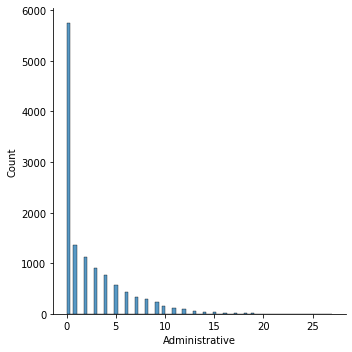

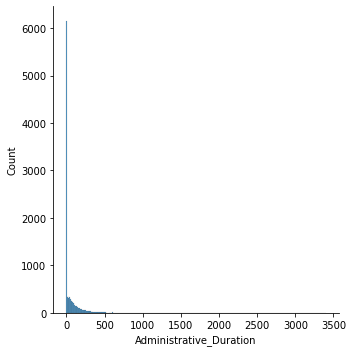

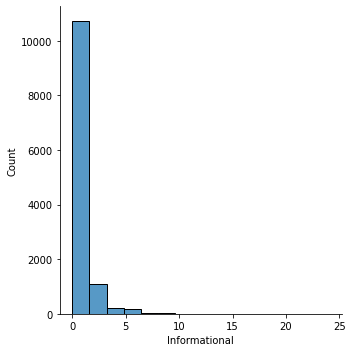

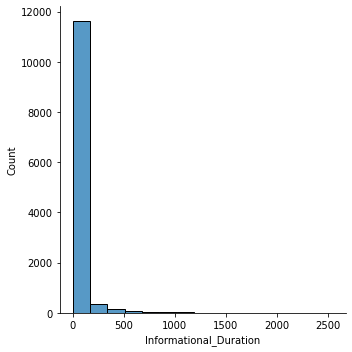

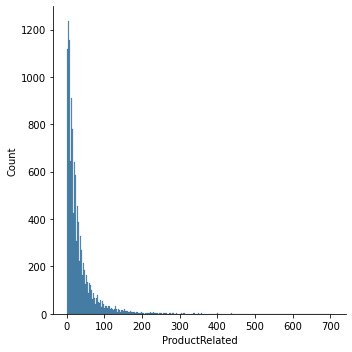

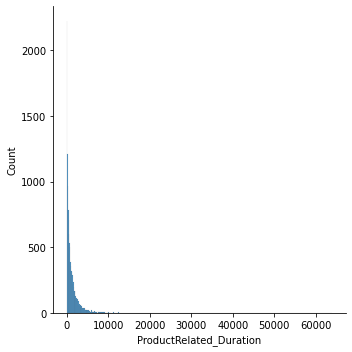

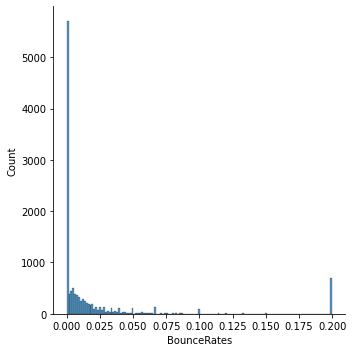

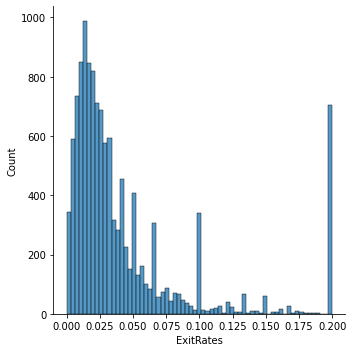

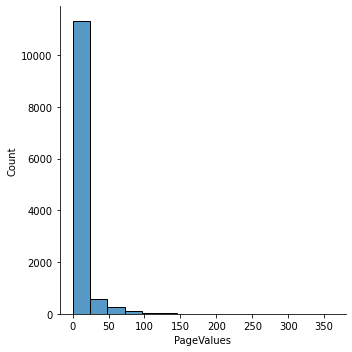

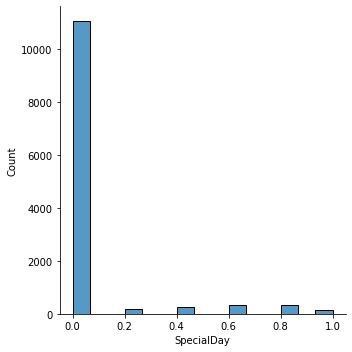

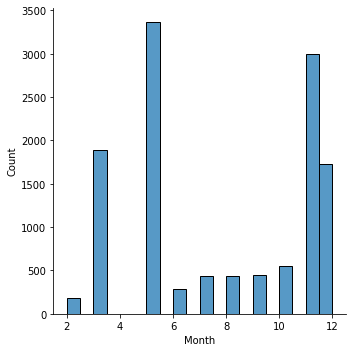

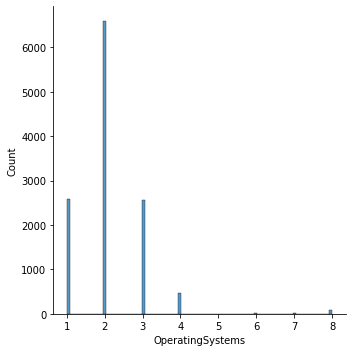

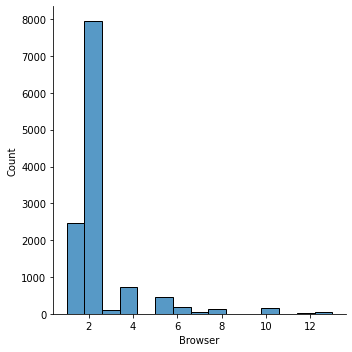

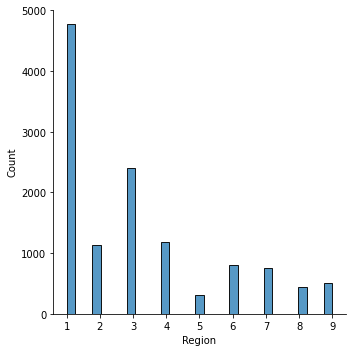

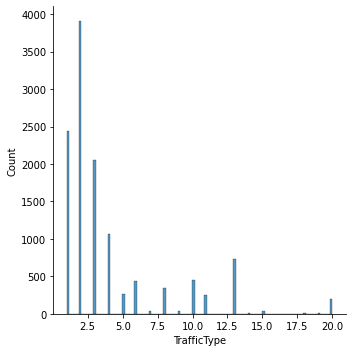

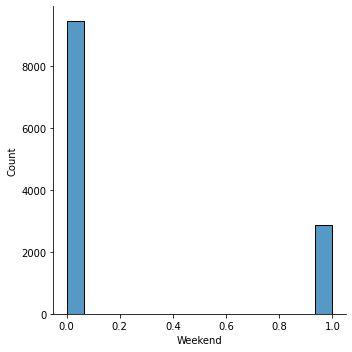

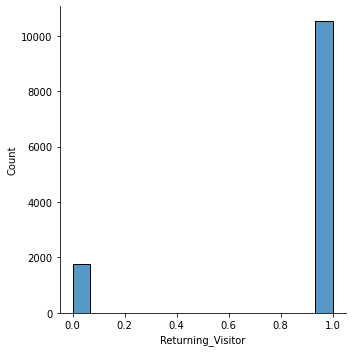

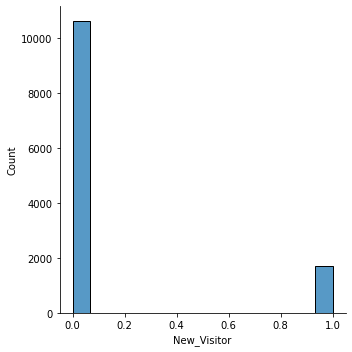

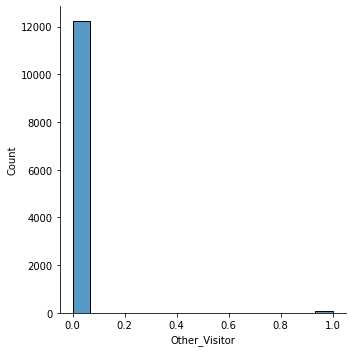

In [43]:
# Plot Distributions
for column in online_shopping.columns[online_shopping.columns != 'Revenue']:
    sns.displot(online_shopping[column])
    plt.show()

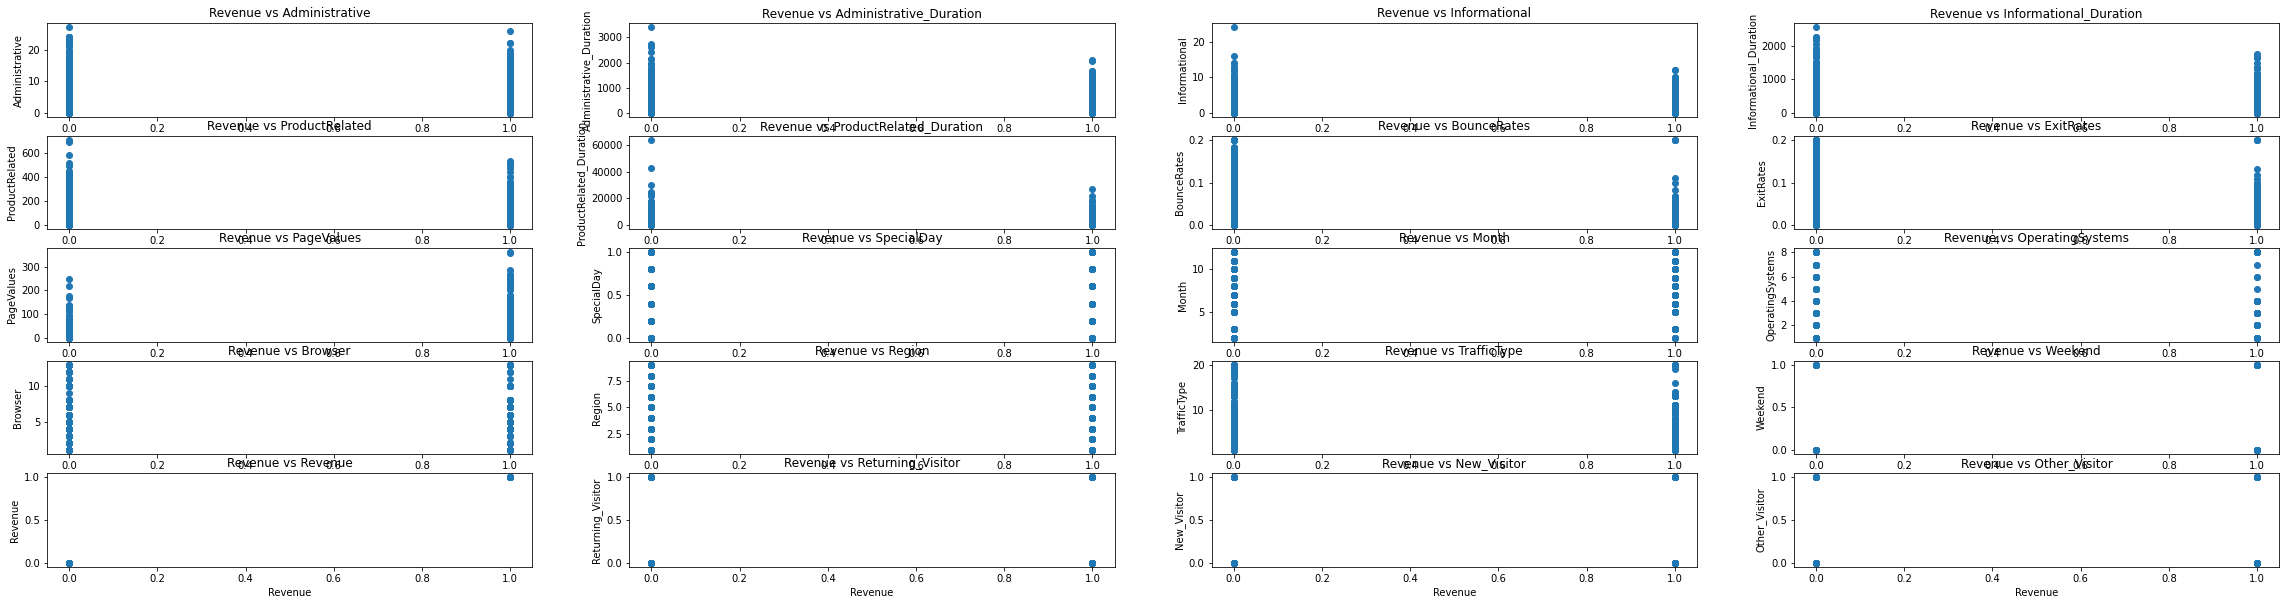

In [44]:
# Plot distribution respecto to class
fig, ax = plt.subplots(5, 4, figsize = (40, 10))

col_index = 0
for i in range(5):
    for y in range(4):
        ax[i, y].plot(online_shopping['Revenue'], online_shopping[online_shopping.columns[col_index]], 'o')
        ax[i, y].set_xlabel('Revenue')
        ax[i, y].set_ylabel(online_shopping.columns[col_index])
        ax[i, y].set_title(f'Revenue vs {online_shopping.columns[col_index]}')
        col_index += 1
plt.show()

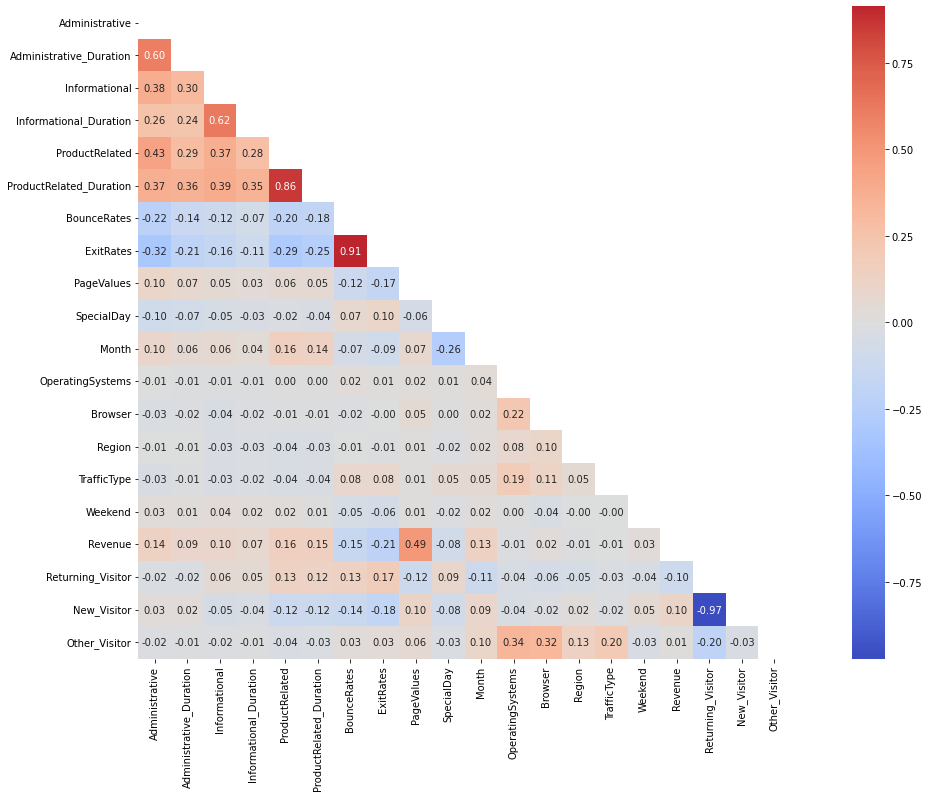

In [45]:
# Correlation Matrix
matrix = online_shopping.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask, annot=True, center=0, fmt='.2f', square=True, cmap="coolwarm")
plt.show()

In [46]:
X = online_shopping.loc[:, online_shopping.columns != 'Revenue']
y = online_shopping['Revenue']


K Scores for motor:

Selected Features:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'Browser', 'Weekend', 'Returning_Visitor', 'New_Visitor'],
      dtype='object')


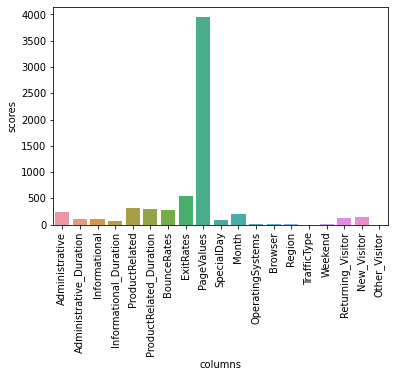

In [47]:
# Remove unnecessary attributes

attributes = X.columns

k_motor_selector = SelectKBest(f_regression, k=15)
k_motor_selector.fit_transform(X, y)

#Selected features
k_columns = k_motor_selector.get_support(indices=True)

print("\nK Scores for motor:")
k_result = pd.DataFrame({'columns': attributes, 'scores': k_motor_selector.scores_})
plot = sns.barplot(x="columns", y="scores", data=k_result)
plot.tick_params(axis='x', rotation=90)

attributes = attributes[k_columns]
print("\nSelected Features:")
print(attributes)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'PageValues', 'SpecialDay', 'Month', 'Browser', 'Weekend',
       'Returning_Visitor', 'New_Visitor'],
      dtype='object')


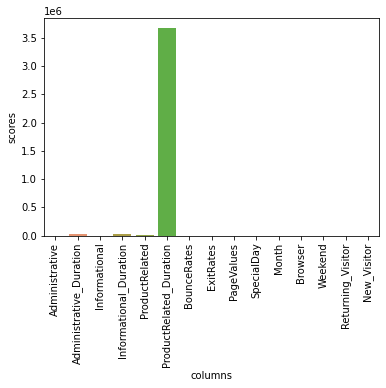

In [48]:
# Remove low variance attributes

v_selector = VarianceThreshold(threshold=0.01)

v_selector.fit_transform(X[attributes])

v_cols = v_selector.get_support(indices=True)

v_result = pd.DataFrame({'columns': attributes, 'scores': v_selector.variances_})
plot = sns.barplot(x="columns", y="scores", data=v_result)
plot.tick_params(axis='x', rotation=90)

attributes = attributes[v_cols]
print(attributes)

What are the attributes that are most related to the class variable (Revenue)? Support your response using at least 2 attribute selection methods. 
- KSelector: We selected the attributes with less correlation
- VarianceThreshold: We selected the attributes with a low variance threshold, but not too low.

# Classification

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score


Under - Over sampling - SMOTEENN (Sythetic Minority Oversampling Technique Edited Nearest Neighbours)

In [50]:
X = X[attributes]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,random_state=0)

In [56]:
y.value_counts()

0    10408
1     1908
Name: Revenue, dtype: int64

In [57]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_smotenn, y_smotenn = smote_enn.fit_resample(X,y)


print('Tamaño de X antes de aplicar el SMOTEENN:', X.shape)
print('Tamaño de X después de aplicar el SMOTEENN:', X_smotenn.shape)
print('Veamos el Balance de clases: \n', y_smotenn.value_counts())
print('Nuestras clases están menos desbalanceadas')

Tamaño de X antes de aplicar el SMOTEENN: (12316, 13)
Tamaño de X después de aplicar el SMOTEENN: (16102, 13)
Veamos el Balance de clases: 
 1    8840
0    7262
Name: Revenue, dtype: int64
Nuestras clases están menos desbalanceadas


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_smotenn, y_smotenn, test_size=0.2, random_state=0, stratify=y_smotenn)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12881, 13), (3221, 13), (12881,), (3221,))

In [60]:
pd.value_counts(y_train)

1    7072
0    5809
Name: Revenue, dtype: int64

In [62]:
#Definimos el modelo
modelo1 = LogisticRegression(random_state=0, class_weight='balanced')

#Entrenamos el modelo
modelo1.fit(X_train, y_train)

c:\users\cristian.correa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=0)

In [63]:
#Hagamos predicciones
y_pred1 = modelo1.predict(X_test)
print(y_pred1[0:5])
y_test.head()

[1 1 0 1 0]


15547    1
13006    1
4651     0
8844     1
3204     0
Name: Revenue, dtype: int32

In [64]:
#Evaluemos el modelo
#Veamos los Accuracy de train y test
Accuracy_train = modelo1.score(X_train,y_train)
print('Accuracy train =', Accuracy_train)
Accuracy_test = modelo1.score(X_test, y_test)
print('Accuracy test =', Accuracy_test)
print('Diferencia = ', np.abs(Accuracy_train-Accuracy_test))

Accuracy train = 0.9122738917785886
Accuracy test = 0.9049984476870537
Diferencia =  0.0072754440915349106


In [66]:
print(f"Accuracy: \n {accuracy_score(y_test, y_pred1)}")
print(f"Report: \n {classification_report(y_test, y_pred1)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred1)}")

Accuracy: 
 0.9049984476870537
Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1453
           1       0.95      0.87      0.91      1768

    accuracy                           0.90      3221
   macro avg       0.91      0.91      0.90      3221
weighted avg       0.91      0.90      0.91      3221

Confusion Matrix: 
 [[1379   74]
 [ 232 1536]]


In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [52]:
# Logistic Regression

l_model = LogisticRegression(penalty='l2')
l_model.fit(X_train, y_train)
l_y_pred = l_model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, l_y_pred)}")
print(f"R^2: {r2_score(y_test, l_y_pred)}")
print(f"Report: \n {classification_report(y_test, l_y_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, l_y_pred)}")

MSE: 0.8127705627705628
R^2: -5.075381503952932
Report: 
               precision    recall  f1-score   support

           0       1.00      0.03      0.06      1554
           1       0.16      1.00      0.28       294

    accuracy                           0.19      1848
   macro avg       0.58      0.52      0.17      1848
weighted avg       0.87      0.19      0.10      1848

Confusion Matrix: 
 [[  52 1502]
 [   0  294]]


c:\users\cristian.correa\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [22]:
# DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(random_state=1)
dtree_model.fit(X_train, y_train)

dtree_model_y_predict = dtree_model.predict(X_test)

print(f"Accuracy: \n {accuracy_score(y_test, dtree_model_y_predict)}")
print(f"Report: \n {classification_report(y_test, dtree_model_y_predict)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,dtree_model_y_predict)}")


c:\users\cristian.correa\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 
 0.8679653679653679
Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      1554
           1       0.69      0.31      0.42       294

    accuracy                           0.87      1848
   macro avg       0.79      0.64      0.67      1848
weighted avg       0.85      0.87      0.85      1848

Confusion Matrix: 
 [[1514   40]
 [ 204   90]]


In [55]:
import graphviz
from sklearn.tree import export_graphviz
dtree = dtree_model.fit(X_train, y_train)
dot_data = export_graphviz(dtree,feature_names=X.columns,
                           class_names=['0','1'],filled=True,out_file=None)
graph = graphviz.Source(dot_data,format='png')
graph

## Random Forest
#### This algorithm basicaly consists of creating N trees randomly and comparing those results to give a definitive result.

In [23]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators is the number of random trees
random_forest_model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

random_forest_model.fit(X_train,y_train)


random_forest_y_predict = random_forest_model.predict(X_test)

print(f"Accuracy: \n {accuracy_score(y_test,random_forest_y_predict)}")
print(f"Report: \n {classification_report(y_test, random_forest_y_predict)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, random_forest_y_predict)}")

"""The accuracy has improved, this may be because in the 500 trees that he has randomly created,
he has been able to find certain patterns of the solution of these trees to improve the result.
"""

c:\users\cristian.correa\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 
 0.8430735930735931
Report: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1554
           1       0.51      0.39      0.44       294

    accuracy                           0.84      1848
   macro avg       0.70      0.66      0.68      1848
weighted avg       0.83      0.84      0.83      1848

Confusion Matrix: 
 [[1443  111]
 [ 179  115]]


'The accuracy has improved, this may be because in the 500 trees that he has randomly created,\nhe has been able to find certain patterns of the solution of these trees to improve the result.\n'

## Neural Network

In [24]:

mlp_model = MLPClassifier(max_iter=300, hidden_layer_sizes=[8, 4], activation='logistic')
mlp_model.fit(X_train, y_train)

mlp_pred = mlp_model.predict(X_test)

print(f"Accuracy^2: {accuracy_score(y_test, mlp_pred)}")
print(f"Report: \n {classification_report(y_test, mlp_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, mlp_pred)}")

Accuracy^2: 0.8387445887445888
Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1554
           1       0.45      0.07      0.12       294

    accuracy                           0.84      1848
   macro avg       0.65      0.53      0.51      1848
weighted avg       0.79      0.84      0.79      1848

Confusion Matrix: 
 [[1530   24]
 [ 274   20]]


c:\users\cristian.correa\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


# Intelligent System

In [25]:
model_dict = {
    '1': l_model,
    '2': dtree_model,
    '3': random_forest_model,
    '4': mlp_model
}

In [ ]:
print('Welcome...')
administrative = input('Administrative: ')
administrative_duration = input('Administrative_Duration: ')
informational = input('Informational: ')
informational_duration = input('Informational_Duration: ')
product_realted = input('ProductRelated: ')
product_realted_duration = input('ProductRelated_Duration: ')
page_values = input('PageValues: ')
special_day = input('SpecialDay: ')
month =input('Month: ')
browser = input('Browser: ')
weekend = input('Weekend: ')
reuturning_visitor =input('Returning_Visitor: ')
new_visitor = input('New_Visitor: ')

Welcome...



KeyboardInterrupt



In [27]:
print(
    """
    Select your model:
    1. Logistic Regresion
    2. Decision Tree
    3. Random Forest
    4. Neural Network
    """
)
model_index = input('Number: ')

assert model_index in ['1', '2', '3', '4']

data = np.array([[
    administrative,
    administrative_duration,
    informational,
    informational_duration,
    product_realted,
    product_realted_duration,
    page_values,
    special_day,
    month,
    browser,
    weekend,
    reuturning_visitor,
    new_visitor
]])

result = model_dict[model_index].predict(data)

print(f'Result: {True if result else False}')


    Select your model:
    1. Logistic Regresion
    2. Decision Tree
    3. Random Forest
    4. Neural Network
    



KeyboardInterrupt

